In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
from imperio import TargetImputationTransformer
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df = df.drop(["citric acid", "volatile acidity", "density", "chlorides"], axis=1)


In [6]:
df

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,1.9,11.0,34.0,3.51,0.56,9.4,5
1,7.8,2.6,25.0,67.0,3.20,0.68,9.8,5
2,7.8,2.3,15.0,54.0,3.26,0.65,9.8,5
3,11.2,1.9,17.0,60.0,3.16,0.58,9.8,6
4,7.4,1.9,11.0,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,2.0,32.0,44.0,3.45,0.58,10.5,5
1595,5.9,2.2,39.0,51.0,3.52,0.76,11.2,6
1596,6.3,2.3,29.0,40.0,3.42,0.75,11.0,6
1597,5.9,2.0,32.0,44.0,3.57,0.71,10.2,5


In [7]:
from imperio import TargetImputationTransformer
from sklearn.preprocessing import OrdinalEncoder

In [8]:
tit = TargetImputationTransformer(index=[6])

In [9]:
X = df.drop(["quality"], axis=1).values
y = df["quality"].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_6 = ordinal_encoder.fit_transform(X_train[:, 6].reshape(-1, 1))
X_test_6 = ordinal_encoder.transform(X_test[:, 6].reshape(-1, 1))

In [13]:
X_6.reshape(1,-1)[0]

array([ 5.,  4., 35., ..., 10., 39., 55.])

In [14]:
X_train[:, 6] = X_6.reshape(1,-1)[0]
X_test[:, 6] = X_test_6.reshape(1,-1)[0]

In [15]:
X_train

array([[11.7 ,  2.2 ,  5.  , ...,  3.19,  0.43,  5.  ],
       [ 8.8 ,  2.2 ,  5.  , ...,  3.36,  0.49,  4.  ],
       [ 7.1 ,  2.1 ,  9.  , ...,  3.42,  0.55, 35.  ],
       ...,
       [ 7.2 ,  2.7 , 15.  , ...,  3.51,  0.54, 10.  ],
       [ 7.9 ,  1.7 ,  7.  , ...,  3.32,  0.8 , 39.  ],
       [ 5.8 ,  1.7 ,  3.  , ...,  3.39,  0.54, 55.  ]])

In [16]:
X_train_tr = tit.fit_transform(X_train, y_train)
X_test_tr = tit.transform(X_test)

In [17]:
X_train_tr

array([[11.7       ,  2.2       ,  5.        , ...,  3.19      ,
         0.43      ,  5.22641509],
       [ 8.8       ,  2.2       ,  5.        , ...,  3.36      ,
         0.49      ,  5.15789474],
       [ 7.1       ,  2.1       ,  9.        , ...,  3.42      ,
         0.55      ,  6.        ],
       ...,
       [ 7.2       ,  2.7       , 15.        , ...,  3.51      ,
         0.54      ,  5.33018868],
       [ 7.9       ,  1.7       ,  7.        , ...,  3.32      ,
         0.8       ,  6.14285714],
       [ 5.8       ,  1.7       ,  3.        , ...,  3.39      ,
         0.54      ,  6.        ]])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)

In [22]:
model_list = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

In [23]:
for model in model_list:
    model.fit(X_train_tr, y_train)
    y_pred = model.predict(X_test_tr)
    print(model.__class__)
    print(mean_squared_error(y_pred, y_test))

<class 'sklearn.linear_model._base.LinearRegression'>
0.8611581982047056
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
0.46459999999999996
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
0.705


In [26]:
for model in model_list:
    model.fit(X_train_tr, y_train)
    y_pred = model.predict(X_test_tr)
    print(model.__class__)
    print(mean_squared_error(y_pred, y_test))

<class 'sklearn.linear_model._base.LinearRegression'>
0.8611581982047056
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
0.46459999999999996
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
0.7275


In [27]:
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
y_test

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [29]:
y_pred

array([5., 5., 6., 6., 6., 5., 5., 5., 6., 6., 7., 3., 6., 5., 5., 6., 5.,
       6., 7., 5., 5., 6., 6., 6., 5., 6., 5., 4., 6., 6., 6., 5., 6., 6.,
       6., 5., 6., 6., 5., 5., 7., 5., 7., 5., 6., 6., 7., 6., 5., 5., 4.,
       5., 6., 7., 5., 5., 6., 6., 5., 5., 7., 6., 6., 5., 6., 5., 7., 6.,
       7., 6., 6., 5., 6., 7., 6., 5., 6., 5., 7., 6., 5., 7., 5., 6., 6.,
       6., 5., 6., 5., 6., 6., 4., 5., 5., 4., 5., 5., 5., 4., 7., 5., 5.,
       6., 7., 6., 7., 6., 5., 6., 5., 7., 5., 7., 5., 7., 7., 6., 5., 5.,
       6., 6., 6., 5., 6., 6., 6., 6., 7., 5., 6., 6., 5., 5., 6., 5., 5.,
       6., 5., 6., 6., 7., 8., 7., 4., 6., 5., 7., 6., 5., 5., 6., 7., 6.,
       5., 6., 5., 6., 6., 6., 6., 7., 6., 6., 5., 6., 6., 6., 5., 3., 6.,
       5., 4., 7., 4., 7., 5., 6., 5., 5., 4., 5., 6., 5., 6., 4., 5., 7.,
       5., 7., 4., 6., 7., 6., 6., 7., 5., 4., 6., 5., 7., 5., 6., 6., 5.,
       7., 5., 5., 4., 3., 6., 7., 5., 5., 6., 7., 4., 6., 5., 6., 5., 5.,
       6., 6., 6., 6., 5.

In [30]:
X_train_tr

array([[ 1.97418149, -0.24631811, -1.06000722, ..., -0.78641859,
        -1.3131938 , -0.89692432],
       [ 0.28189382, -0.24631811, -1.06000722, ...,  0.3161036 ,
        -0.97064635, -1.05027144],
       [-0.71013687, -0.31717594, -0.66975661, ...,  0.70522908,
        -0.62809889,  0.83434247],
       ...,
       [-0.65178213,  0.10797101, -0.08438071, ...,  1.28891729,
        -0.68519014, -0.66468121],
       [-0.2432989 , -0.60060724, -0.86488191, ...,  0.05668661,
         0.79918216,  1.15405376],
       [-1.46874859, -0.60060724, -1.25513252, ...,  0.51066634,
        -0.68519014,  0.83434247]])

<AxesSubplot:>

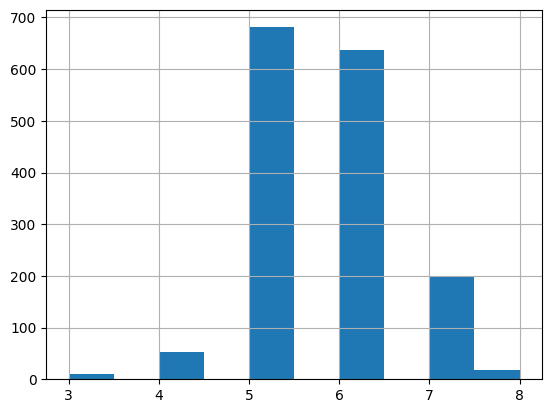

In [31]:
df['quality'].hist()